## Parser for .res files

In [71]:
import json
added_lines = []

with open("dfvs.jar.res", 'r') as f:
    lines = f.readlines()
    data = {}
    for line in lines:

        temp = {}

        if 'correct' in line:
            split_arr = line.split('\t')
            time = split_arr[1].strip().split(' ')[0]
            temp['t'] = float(time[time.index(':')+1:]) + 60*float(time[:time.index(':')])
            temp['k'] = int(split_arr[2][1:split_arr[2].index(',')])
        else:
            continue
            
        if 'complex' in line:
            temp['c'] = 'complex'
        elif 'synthetic' in line:
            temp['c'] = 'synthetic'
        else:
            temp['c'] = 'unknown'

        name = line[line.index(temp['c'] + '/')+len(temp['c'])+1: line.index(' ')]

        if name in added_lines:
            continue
        added_lines.append(name)

        temp['n'] = int(name[name.index('-n_')+3: name.index('-m_')])
        
        if '-p_' not in name:
            if '.mtx' in name:
                temp['m'] = int(name[name.index('-m_')+3: name.index('.mtx')])
            else:
                    temp['m'] = int(name[name.index('-m_')+3:])
        else:
            if '-k_'in name:
                temp['m'] = int(name[name.index('-m_')+3: name.index('-k_')])
            else:
                temp['m'] = int(name[name.index('-m_')+3: name.index('-p_')])
    
        data[name] = temp

with open('result.json', 'w') as f:
    json.dump(data, f)

In [73]:
# Reading in data and creating a dataframe
import json
import matplotlib.pyplot as plt
import pandas as pd
from math import log
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

with open('result.json', 'r') as f:
    data = json.loads(f.read())

df = pd.DataFrame(data).transpose()
df.columns = ['t', 'k', 'class', 'n', 'm']

<Figure size 640x640 with 0 Axes>

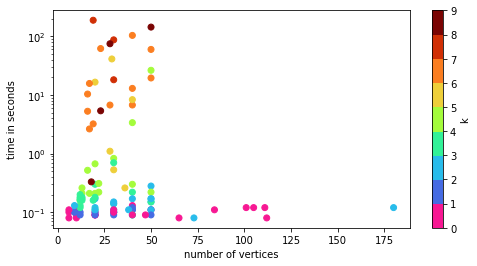

In [74]:
k = max(df['k'])

viridis = cm.get_cmap('turbo', k)
newcolors = viridis(np.linspace(0, 1, k))
pink = np.array([248/256, 24/256, 148/256, 1])
newcolors[:1, :] = pink
newcmp = ListedColormap(newcolors)

fig, ax = plt.subplots(figsize=(8,4))

im = ax.scatter(df['n'], df['t'], c=df['k'], cmap=newcmp)
ax.set_yscale('log')
ax.set_xlabel('number of vertices')
ax.set_ylabel('time in seconds')

color_bar = fig.colorbar(im, orientation="vertical")
color_bar.ax.set_ylabel('k')
plt.savefig("all.png")
plt.show()

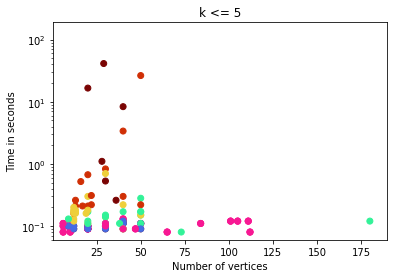

In [76]:
for i in [0,1,5]:
    plt.scatter(df['n'][df['k'] <= i], df['t'][df['k'] <= i], c=df['k'][df['k'] <= i], cmap=newcmp)
    plt.ylim(top=190)
    plt.xlim([0.06,190])
    plt.ylim(bottom=0.06)
    plt.yscale('log')
    plt.xlabel("Number of vertices")
    plt.ylabel("Time in seconds")
    plt.title("k <= " + str(i))
    plt.savefig(str(i) + ".png")